In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

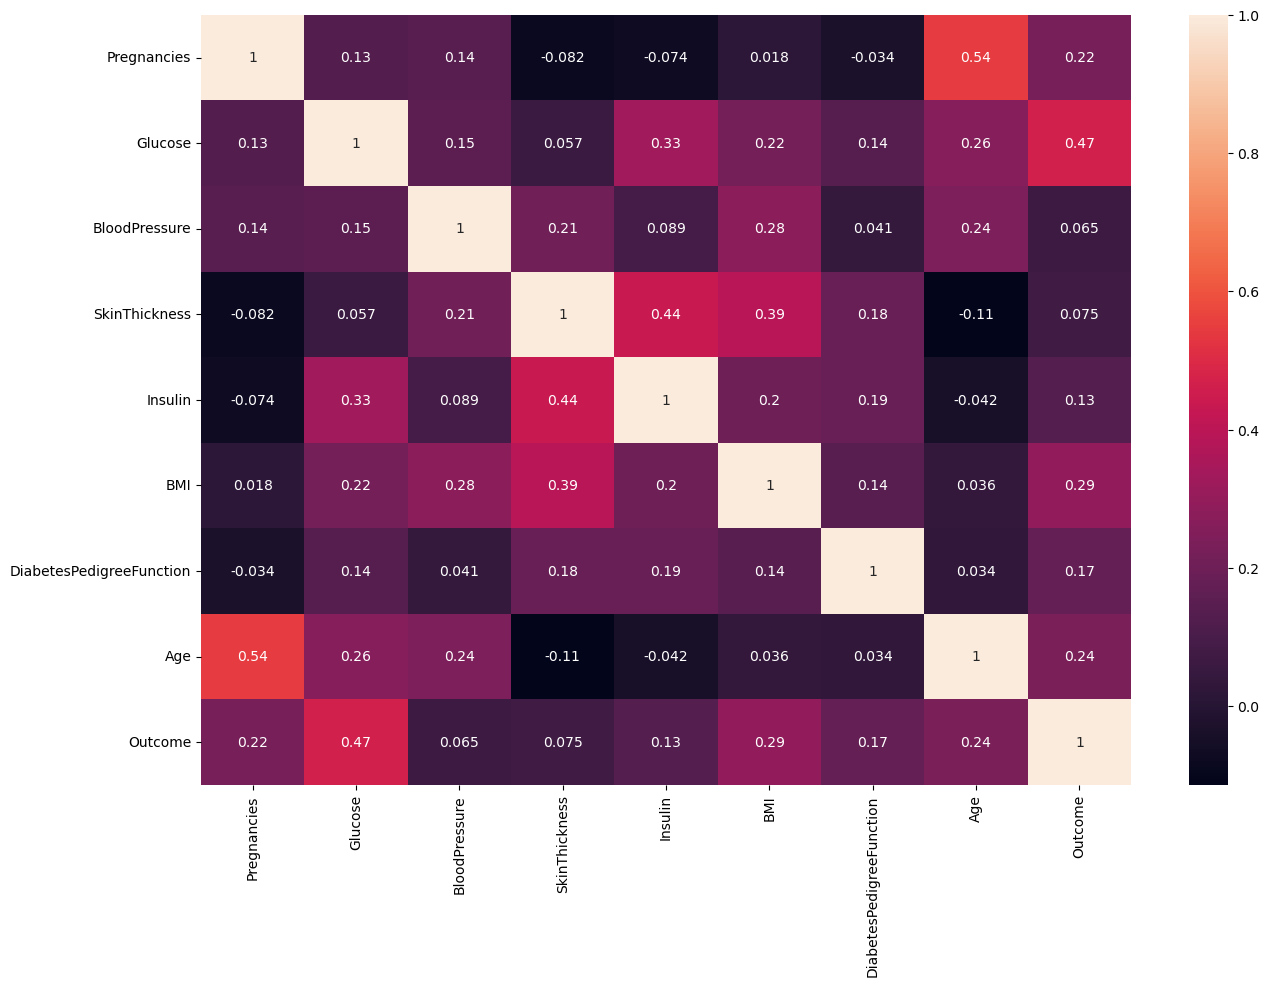

In [3]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.shape

(768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
import numpy as np
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
# for col in zero_not_accepted:
#     for i in data[col]:
#         if i==0:
#             colSum = sum(data[col])
#             meanCol=colSum/len(data[col])
#             data[col]=meanCol

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)

In [8]:



inputs = data.drop(['BloodPressure', 'SkinThickness', 'Outcome'], 'columns')
outputs =  data['Outcome']

print(outputs)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


C:\Users\srini\AppData\Local\Temp\ipykernel_13176\2531324268.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  inputs = data.drop(['BloodPressure', 'SkinThickness', 'Outcome'], 'columns')


In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(inputs,outputs,test_size=0.2,random_state=0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=27)

model.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import confusion_matrix,r2_score,accuracy_score




print(accuracy_score(y_test,y_pred))

#res=model.predict([[1,89,60,23,94,28.1,0.167,21]])
#print(res)

0.7857142857142857


In [11]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [ ]:
# -*- coding: utf-8 -*-

# Form implementation generated from reading ui file 'diabetes.ui'
#
# Created by: PyQt5 UI code generator 5.15.4
#
# WARNING: Any manual changes made to this file will be lost when pyuic5 is
# run again.  Do not edit this file unless you know what you are doing.


from PyQt5 import QtCore, QtGui, QtWidgets


class Ui_Form(object):
    def setupUi(self, Form):
        Form.setObjectName("Form")
        Form.resize(820, 822)
        self.widget = QtWidgets.QWidget(Form)
        self.widget.setGeometry(QtCore.QRect(0, 0, 821, 881))
        self.widget.setStyleSheet("QWidget#widget{\n"
"background-color:qradialgradient(spread:pad, cx:0.5, cy:0.5, radius:1.521, fx:0.495, fy:0.506, stop:0 rgba(252, 246, 189, 255), stop:1 rgba(255, 255, 255, 255))\n"
"\n"
"}\n"
"")
        self.widget.setObjectName("widget")
        self.label = QtWidgets.QLabel(self.widget)
        self.label.setGeometry(QtCore.QRect(230, 20, 521, 61))
        self.label.setStyleSheet("font: 75 26pt \"MS Shell Dlg 2\";\n"
"color:rgb(67, 40, 24)")
        self.label.setObjectName("label")
        self.widget_2 = QtWidgets.QWidget(self.widget)
        self.widget_2.setGeometry(QtCore.QRect(80, 110, 671, 571))
        self.widget_2.setStyleSheet("QWidget#widget_2{background-color:qradialgradient(spread:pad, cx:0.5, cy:0.5, radius:1.521, fx:0.495, fy:0.506, stop:0 rgba(67, 40, 24, 255), stop:1 rgba(255, 255, 255, 255));\n"
"border-radius:20%;\n"
" backdrop-filter: blur(4px);\n"
"box-shadow: 0 0 20px #000;\n"
"transition: 0.4s all;\n"
"}\n"
"qradialgradient(spread:pad, cx:0.5, cy:0.5, radius:1.521, fx:0.495, fy:0.506, stop:0 rgba(0, 48, 73, 255), stop:1 rgba(255, 255, 255, 255))")
        self.widget_2.setObjectName("widget_2")
        self.label_2 = QtWidgets.QLabel(self.widget_2)
        self.label_2.setGeometry(QtCore.QRect(50, 30, 351, 41))
        self.label_2.setStyleSheet("color:rgb(255, 255, 255);\n"
"font: 13pt \"MS Shell Dlg 2\";")
        self.label_2.setObjectName("label_2")
        self.label_3 = QtWidgets.QLabel(self.widget_2)
        self.label_3.setGeometry(QtCore.QRect(160, 90, 131, 31))
        self.label_3.setStyleSheet("color:rgb(255, 255, 255);\n"
"font: 13pt \"MS Shell Dlg 2\";")
        self.label_3.setObjectName("label_3")
        self.label_4 = QtWidgets.QLabel(self.widget_2)
        self.label_4.setGeometry(QtCore.QRect(160, 190, 151, 31))
        self.label_4.setStyleSheet("color:rgb(255, 255, 255);\n"
"font: 13pt \"MS Shell Dlg 2\";")
        self.label_4.setObjectName("label_4")
        self.label_5 = QtWidgets.QLabel(self.widget_2)
        self.label_5.setGeometry(QtCore.QRect(160, 140, 151, 31))
        self.label_5.setStyleSheet("color:rgb(255, 255, 255);\n"
"font: 13pt \"MS Shell Dlg 2\";")
        self.label_5.setObjectName("label_5")
        self.label_6 = QtWidgets.QLabel(self.widget_2)
        self.label_6.setGeometry(QtCore.QRect(160, 240, 151, 31))
        self.label_6.setStyleSheet("color:rgb(255, 255, 255);\n"
"font: 13pt \"MS Shell Dlg 2\";")
        self.label_6.setObjectName("label_6")
        self.label_7 = QtWidgets.QLabel(self.widget_2)
        self.label_7.setGeometry(QtCore.QRect(160, 290, 131, 31))
        self.label_7.setStyleSheet("color:rgb(255, 255, 255);\n"
"font: 13pt \"MS Shell Dlg 2\";")
        self.label_7.setObjectName("label_7")
        self.label_8 = QtWidgets.QLabel(self.widget_2)
        self.label_8.setGeometry(QtCore.QRect(160, 340, 311, 31))
        self.label_8.setStyleSheet("color:rgb(255, 255, 255);\n"
"font: 13pt \"MS Shell Dlg 2\";")
        self.label_8.setObjectName("label_8")
        self.label_9 = QtWidgets.QLabel(self.widget_2)
        self.label_9.setGeometry(QtCore.QRect(160, 390, 131, 31))
        self.label_9.setStyleSheet("color:rgb(255, 255, 255);\n"
"font: 13pt \"MS Shell Dlg 2\";")
        self.label_9.setObjectName("label_9")
        self.glucose = QtWidgets.QLineEdit(self.widget_2)
        self.glucose.setGeometry(QtCore.QRect(340, 90, 131, 31))
        self.glucose.setObjectName("glucose")
        self.blood = QtWidgets.QLineEdit(self.widget_2)
        self.blood.setGeometry(QtCore.QRect(340, 140, 131, 31))
        self.blood.setObjectName("blood")
        self.insulin = QtWidgets.QLineEdit(self.widget_2)
        self.insulin.setGeometry(QtCore.QRect(340, 240, 131, 31))
        self.insulin.setObjectName("insulin")
        self.skin = QtWidgets.QLineEdit(self.widget_2)
        self.skin.setGeometry(QtCore.QRect(340, 190, 131, 31))
        self.skin.setObjectName("skin")
        self.bmi = QtWidgets.QLineEdit(self.widget_2)
        self.bmi.setGeometry(QtCore.QRect(340, 290, 131, 31))
        self.bmi.setObjectName("bmi")
        self.pedfunc = QtWidgets.QLineEdit(self.widget_2)
        self.pedfunc.setGeometry(QtCore.QRect(340, 340, 131, 31))
        self.pedfunc.setObjectName("pedfunc")
        self.age = QtWidgets.QLineEdit(self.widget_2)
        self.age.setGeometry(QtCore.QRect(340, 390, 131, 31))
        self.age.setObjectName("age")
        self.pushButton = QtWidgets.QPushButton(self.widget_2)
        self.pushButton.setGeometry(QtCore.QRect(270, 480, 111, 31))
        self.pushButton.setStyleSheet("\n"
"background-color: rgb(170, 255, 255);\n"
"font: 12pt \"MS Shell Dlg 2\";")
        self.pushButton.setObjectName("pushButton")
        self.preg = QtWidgets.QLineEdit(self.widget_2)
        self.preg.setGeometry(QtCore.QRect(340, 40, 131, 31))
        self.preg.setObjectName("preg")
        self.result = QtWidgets.QLabel(self.widget)
        self.result.setGeometry(QtCore.QRect(110, 700, 241, 51))
        self.result.setStyleSheet("font: 75 16pt \"MS Shell Dlg 2\";\n"
"color:rgb(214, 40, 40)")
        self.result.setObjectName("result")
        self.myans = QtWidgets.QLabel(self.widget)
        self.myans.setGeometry(QtCore.QRect(370, 710, 181, 41))
        self.myans.setStyleSheet("font: 75 16pt \"MS Shell Dlg 2\";\n"
"color:rgb(214, 40, 40)")
        self.myans.setText("")
        self.myans.setObjectName("myans")
        
        self.pushButton.clicked.connect(self.predict)
        
        

        self.retranslateUi(Form)
        QtCore.QMetaObject.connectSlotsByName(Form)
        
    def predict(self):
        a=self.preg.text()
        a1=int(a)
        b=self.glucose.text()
        b1=int(b)
        c=self.blood.text()
        c1=int(c)
        d=self.skin.text()
        d1=int(d)
        e=self.insulin.text()
        e1=int(e)
        f=self.bmi.text()
        f1=float(f)
        g=self.pedfunc.text()
        g1=float(g)
        h=self.age.text()
        h1=int(h)
            
            
        res=model.predict([[a,b,e,f,g,h]])
            
        if res == 0:
            self.result.setText('No')
        elif res == 1:
            self.result.setText('Yes')
        print(res)
        self.myans.setText(str(res))

    def retranslateUi(self, Form):
        _translate = QtCore.QCoreApplication.translate
        Form.setWindowTitle(_translate("Form", "Form"))
        self.label.setText(_translate("Form", "Diabetes Prediction"))
        self.label_2.setText(_translate("Form", "<html><head/><body><p align=\"center\">Pregnancies:</p></body></html>"))
        self.label_3.setText(_translate("Form", "Glucose:"))
        self.label_4.setText(_translate("Form", "SkinThickness:"))
        self.label_5.setText(_translate("Form", "BloodPressure:    "))
        self.label_6.setText(_translate("Form", "Insulin"))
        self.label_7.setText(_translate("Form", "BMI"))
        self.label_8.setText(_translate("Form", "PedigreeFunction:"))
        self.label_9.setText(_translate("Form", "Age:"))
        self.pushButton.setText(_translate("Form", "Predict"))
        self.result.setText(_translate("Form", "Result of Prediction:"))


if __name__ == "__main__":
    import sys
    app = QtWidgets.QApplication(sys.argv)
    Form = QtWidgets.QWidget()
    ui = Ui_Form()
    ui.setupUi(Form)
    Form.show()
    sys.exit(app.exec_())


C:\Users\srini\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\srini\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


[0]


C:\Users\srini\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\srini\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


[0]


C:\Users\srini\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\srini\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


[0]
